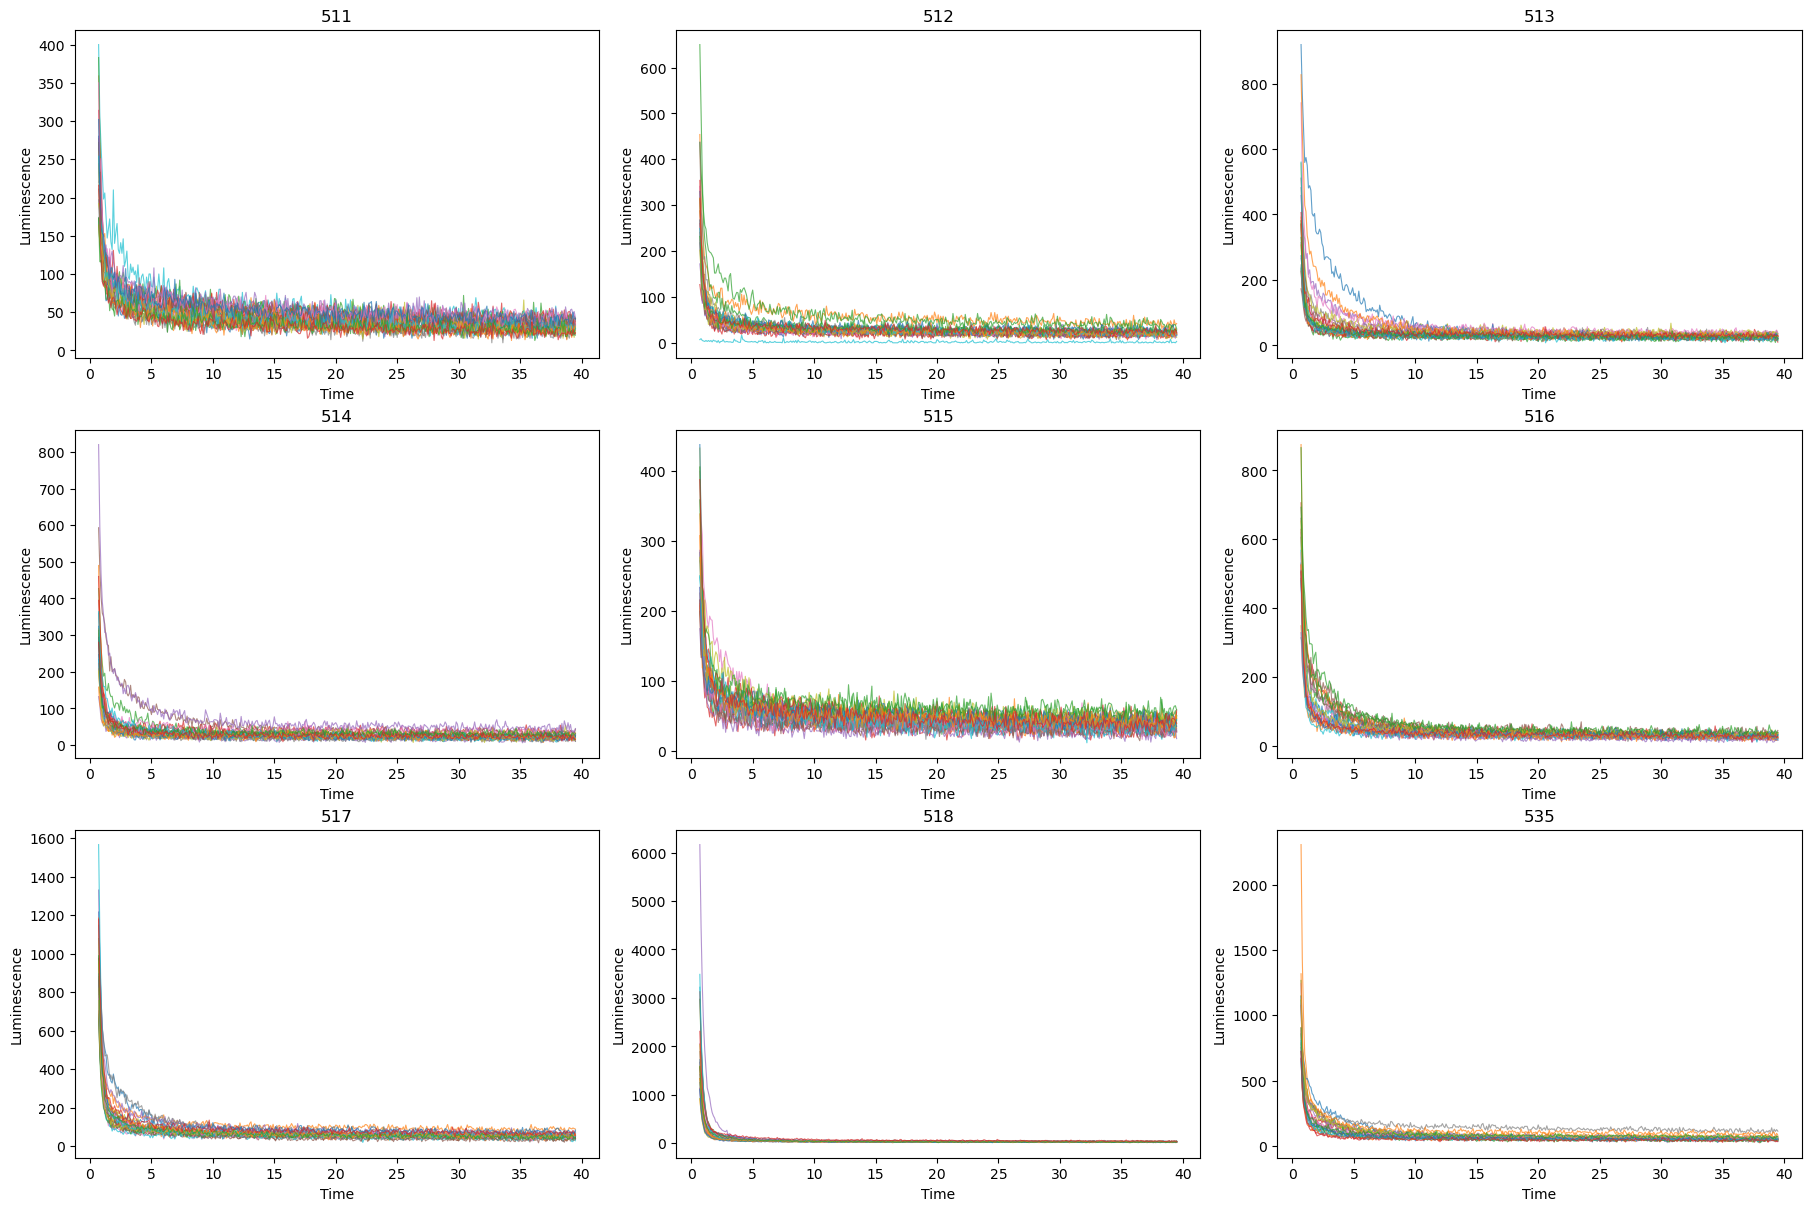

✓ processed (cropped) data saved to output\processed_data.pkl


In [ ]:
import os, pickle
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# Paths
# ------------------------------------------------------------------
excel_path  = 'data/data.xlsx'
output_dir  = 'output'
pickle_file = os.path.join(output_dir, 'processed_data.pkl')
os.makedirs(output_dir, exist_ok=True)

# ------------------------------------------------------------------
# Load every sheet, clean, crop, store
# ------------------------------------------------------------------
if not os.path.exists(excel_path):
    print(f"File {excel_path} not found. Current directory contents:")
    for root, _, files in os.walk('.'):
        for f in files:
            print(os.path.join(root, f))
    raise SystemExit

sheets  = pd.read_excel(excel_path, sheet_name=None, header=None)
cleaned = {}

for name, df in sheets.items():
    df_t = (
        df.drop(index=0)          # drop the textual first row
          .reset_index(drop=True)
          .T                      # transpose
    )
    df_t.columns = df_t.iloc[0]   # promote first transposed row to header
    df_t = df_t.drop(index=0).reset_index(drop=True)

    # ensure numeric dtypes
    df_t = df_t.apply(pd.to_numeric, errors='ignore')

    # -------- CROP: keep Time_index in [7, 395] -------------------
    mask  = (df_t['Time_index'] >= 7) & (df_t['Time_index'] <= 395)
    df_t  = df_t.loc[mask].reset_index(drop=True)

    cleaned[name] = df_t

# ------------------------------------------------------------------
# Quick-look plot: 3 × 3 grid
# ------------------------------------------------------------------
fig, axes = plt.subplots(3, 3, figsize=(18, 12), layout='constrained')
axes = axes.ravel()

for ax, (name, df_t) in zip(axes, cleaned.items()):
    time    = df_t['Time'].astype(float).values
    slices  = df_t.drop(columns=['Time_index', 'Time'])

    ax.plot(time, slices.values, lw=0.8, alpha=0.7)
    ax.set_title(name)
    ax.set_xlabel('Time')
    ax.set_ylabel('Luminescence')

# remove unused panes if < 9 sheets
for ax in axes[len(cleaned):]:
    ax.remove()

plt.show()

# ------------------------------------------------------------------
# Pickle the cropped data
# ------------------------------------------------------------------
with open(pickle_file, 'wb') as f:
    pickle.dump(cleaned, f)

print(f'✓ processed (cropped) data saved to {pickle_file}')
